# Homework 6
### ASTR-324, Spring 2017, Ivezic & Juric, University of Washington
https://github.com/uw-astr-324-s17/astr-324-s17


## Problem

Below in the notebook is the code that generates Figure 10.17 in the textbook. As it is now, it:
* downloads a dataset of variable stars collected with the [LINEAR](https://en.wikipedia.org/wiki/Lincoln_Near-Earth_Asteroid_Research) telescope,
* selects six of them (as given by the `ids` variable,
* computes the Lomb-Scargle periodogram in the `compute_best_frequencies` function,
* finds the best frequency by looking for the highest peak in the periodigram, and
* folds the light curves and plots the results.

Either by modifying the code below, or by writing similar code, do the following:

1. Find the frequencies for the first 100 stars in the LINEAR datasets (i.e., those with IDs in `data.ids[:100]`, where `data` is the variable containing the LINEAR dataset as defined below).

2. Compute the periods corresponing to the frequencies above, and plot the histogram of periods using 50 bins in range $0 < T < 25$ hours. What do you observe in the histogram?

3. Generate two 6-panel figures analogous to Figure 10.17, for 6 stars (arbitrarily chosen) from the highest and second highest peak, respectivelly. Comment on (dis)similarities of the two plots and of stars within each plot.

4. EXTRA CREDIT: compute the histogram in #2 for ALL stars in the data set, not just the first 100 (note: this will take a while!). Modify the histogram range and bin sizes as needed to bring out the features (clusters) in the data.

## Solution

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from astroML.decorators import pickle_results
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit
from astroML.datasets import fetch_LINEAR_sample

% matplotlib inline

# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# 1.) Find the frequencies for the first 100 stars in the LINEAR datasets (i.e., those with IDs in data.ids[:100], where data is the variable containing the LINEAR dataset as defined below)

In [2]:
# Load the data set of the first 100 stars
data = fetch_LINEAR_sample()
ids = data.ids[:100]

In [3]:
# Compute the best frequencies
@pickle_results('LINEAR_LS.pkl')
def compute_best_frequencies(ids, n_eval=10000, n_retry=5, generalized=True):
    results = {}
    for i in ids:
        t, y, dy = data[i].T
        print " - computing power for %i (%i points)" % (i, len(t))
        kwargs = dict(generalized=generalized)
        omega, power = search_frequencies(t, y, dy, n_eval=n_eval,
                                          n_retry=n_retry,
                                          LS_kwargs=kwargs)
        results[i] = [omega, power]

    return results

results = compute_best_frequencies(ids, n_eval=10000, n_retry=5)

@pickle_results: using precomputed results from 'LINEAR_LS.pkl'


In [4]:
# Find best frequency for the first 100 stars
star_dict = {}
for i in range(100):
    star_dat = {}
    t, y, dy = data[ids[i]].T
    omega, power = results[ids[i]]
    omega_best = omega[np.argmax(power)]
    star_dict[ids[i]] = star_dat
    star_dat['omega'] = omega_best
    print "- omega_0 for", ids[i], "= %.10g" % omega_best


- omega_0 for 10003298 = 50.68860719
- omega_0 for 10004892 = 9.342274114
- omega_0 for 10013411 = 11.31471267
- omega_0 for 10021274 = 10.8907631
- omega_0 for 10022663 = 10.20062676
- omega_0 for 10025796 = 45.55493503
- omega_0 for 10028253 = 7.535937452
- omega_0 for 10030349 = 11.52701659
- omega_0 for 10032668 = 17.53065289
- omega_0 for 10038903 = 12.65024236
- omega_0 for 10040133 = 10.29120901
- omega_0 for 10040491 = 22.1463799
- omega_0 for 10045187 = 11.03110337
- omega_0 for 10045615 = 22.0396775
- omega_0 for 10046720 = 10.0363784
- omega_0 for 10047498 = 12.82060684
- omega_0 for 1004849 = 13.70483127
- omega_0 for 1005497 = 9.613121674
- omega_0 for 10064356 = 10.00077894
- omega_0 for 10066464 = 9.448396134
- omega_0 for 10071455 = 21.38496118
- omega_0 for 10084768 = 9.722971358
- omega_0 for 10085065 = 18.61735151
- omega_0 for 10086396 = 9.360612693
- omega_0 for 10089441 = 20.98564547
- omega_0 for 1009459 = 51.10600808
- omega_0 for 10099492 = 33.36187931
- omega_

# 2.) Compute the periods corresponing to the frequencies above, and plot the histogram of periods using 50 bins in range 0 < T < 25 hours. What do you observe in the histogram?

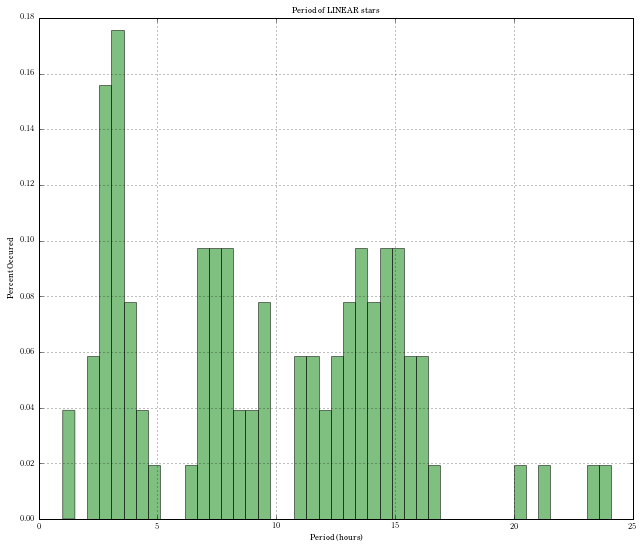

When a histogram of the periods is plotted, 3 obvious groups of stars separate themselves.
One centered around 4, another at 7, and finaly a wide set between 11 and 16.


In [5]:
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(bottom=0.08, top=0.95, right=0.95, hspace=0.1)


# T = 2 * pi / omega
Period = []
for i in star_dict.keys():
    omega_1 = star_dict[i]['omega']
    T_best = (2 * np.pi / omega_1 * 24.)
    Period.append(T_best)
    star_dict[i]['Period'] = T_best

# Plot the periods
ax = fig.add_subplot(111)
plt.hist(Period, 50, normed=1, facecolor='green', alpha=0.5)
ax.set_xlim(0,25)
ax.set_xlabel('Period (hours)')
ax.set_ylabel('Percent Occured')
ax.set_title('Period of LINEAR stars')
plt.grid(True)
plt.show()

print "When a histogram of the periods is plotted, 3 obvious groups of stars separate themselves."
print "One centered around 4, another at 7, and finaly a wide set between 11 and 16."

# 3.) Generate two 6-panel figures analogous to Figure 10.17, for 6 stars (arbitrarily chosen) from the highest and second highest peak, respectivelly. Comment on (dis)similarities of the two plots and of stars within each plot.

In [6]:
# largest peaks between Periods of 2,4 and 14.5,15.5
peak_omega1 = []
peak_period1 = []
peak_ids1 = []
peak_omega2 = []
peak_period2 = []
peak_ids2 = []

# Take 6 sample stars from the two largest peaks
for i in star_dict.keys():
    if star_dict[i]['Period'] < 4 and star_dict[i]['Period'] > 2.5:
        
        peak_omega1.append(star_dict[i]['omega'])
        peak_period1.append(star_dict[i]['Period'])
        peak_ids1.append(i)
    if star_dict[i]['Period'] < 15.5 and star_dict[i]['Period'] > 14.5:
        peak_omega2.append(star_dict[i]['omega'])
        peak_period2.append(star_dict[i]['Period'])
        peak_ids2.append(i)
        
peak1_num = len(peak_omega1) / 2
peak2_num = len(peak_omega2) / 2

peak_omega1 = peak_omega1[(peak1_num-3):(peak1_num+3)]
peak_period1 = peak_period1[(peak1_num-3):(peak1_num+3)]
peak_ids1 = peak_ids1[(peak1_num-3):(peak1_num+3)]
peak_omega2 = peak_omega2[(peak2_num-3):(peak2_num+3)]
peak_period2 = peak_period2[(peak2_num-3):(peak2_num+3)]
peak_ids2 = peak_ids2[(peak2_num-3):(peak2_num+3)]

In [7]:
def plot_mag(omega_lst,period_lst,id_lst):
    """
    Import ordered list of frequencies, periods, and ids.
    Outputs fitted plots.
    """
    
    fig = plt.figure(figsize=(11, 11))
    fig.subplots_adjust(hspace=0.1, bottom=0.06, top=0.94, left=0.12, right=0.94)
    
    itn = 0
    for i in range(6):
        omega_final = omega_lst[i]
        period_final = period_lst[i]
        ID = id_lst[i]
        t, y, dy = data[ID].T
        
        mtf = MultiTermFit(omega_final, 4)
        mtf.fit(t, y, dy)
        phase_fit, y_fit, phased_t = mtf.predict(1000, return_phased_times=True)
    
        ax = fig.add_subplot(321 + itn)
        ax.errorbar(phased_t, y, dy, fmt='.k', ecolor='gray',
                    lw=1, ms=4, capsize=1.5)
        ax.plot(phase_fit, y_fit, '-b', lw=2)
    
        ax.set_xlim(0, 1)
        ax.set_ylim(plt.ylim()[::-1])
        ax.yaxis.set_major_locator(plt.MaxNLocator(4))

        ax.text(0.03, 0.04, "ID = %i" % ID, ha='left', va='bottom', transform=ax.transAxes)
        ax.text(0.03, 0.96, "P = %.2f hr" % period_final, ha='left', va='top', transform=ax.transAxes)
            
        ylim = ax.get_ylim()
        ax.set_ylim(ylim[0], ylim[0] + 1.1 * (ylim[1] - ylim[0]))

        if itn < 4:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        if itn < 2:
            ax.set_title('Variable Star mag vs phase')
        if itn % 4 == 0:
            ax.set_ylabel('mag')

        if itn in (4, 5):
            ax.set_xlabel('phase')
        itn += 1
    
    plt.show()

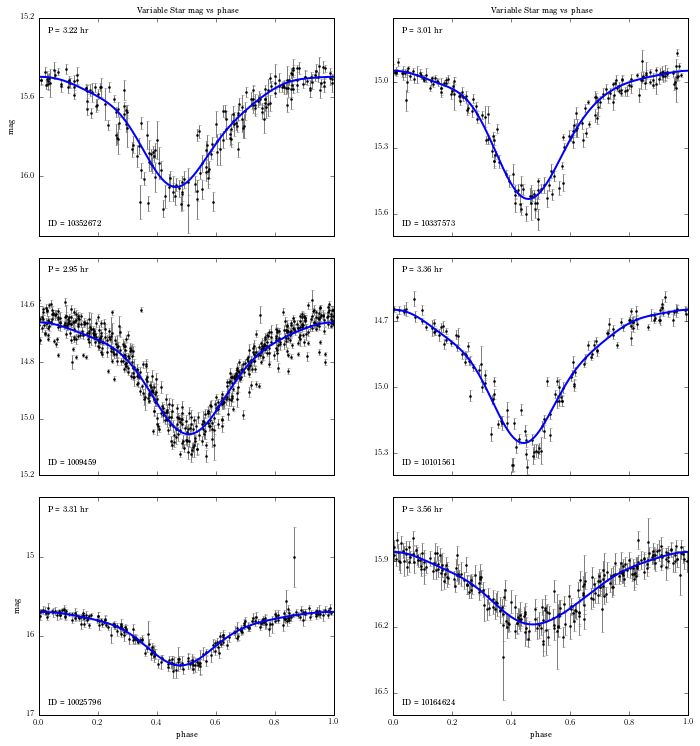

The stars from the largest peaks appear to form a trough when their magnitude is
plotted against their frequency, although they very in depth.  Fairly uniform.


In [8]:
# Plot Stars from the first peak
plot_mag(peak_omega1,peak_period1,peak_ids1)

print "The stars from the largest peaks appear to form a trough when their magnitude is"
print "plotted against their frequency, although they very in depth.  Fairly uniform."

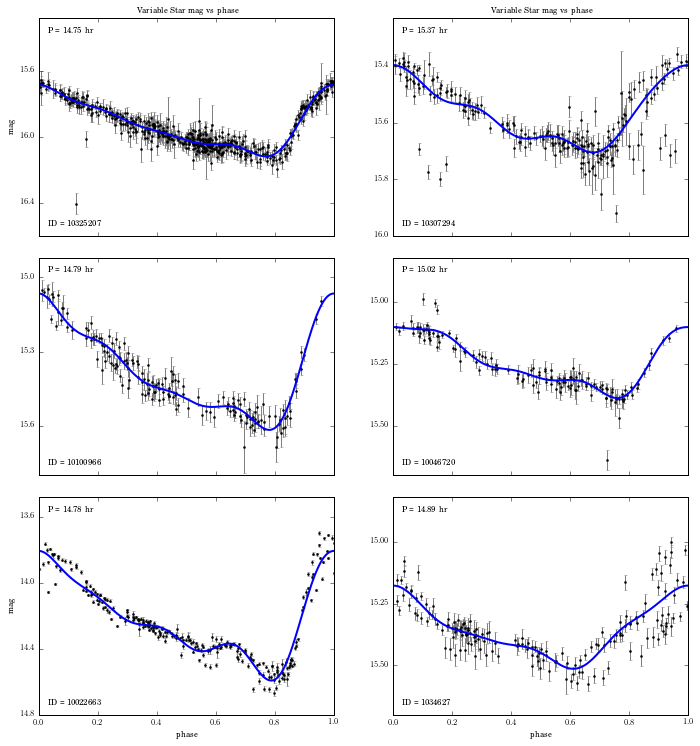

The stars from the second highst peak are very different.  Their mag vs phase plots
are not uniform, like before, and also form a hilly downhill slope, before a
Sharp jump up around a phase of 0.8


In [9]:
# Plot the stars from the second highest peak
plot_mag(peak_omega2,peak_period2,peak_ids2)

print "The stars from the second highst peak are very different.  Their mag vs phase plots"
print "are not uniform, like before, and also form a ""hilly"" downhill slope, before a"
print "Sharp jump up around a phase of 0.8"

# 4.) EXTRA CREDIT: compute the histogram in #2 for ALL stars in the data set, not just the first 100 (note: this will take a while!). Modify the histogram range and bin sizes as needed to bring out the features (clusters) in the data.

In [10]:
# Load the data set of all stars
data = fetch_LINEAR_sample()
ids = data.ids[:]

In [11]:
# Compute the best frequencies
@pickle_results('LINEAR_LS_ec.pkl')
def compute_best_frequencies(ids, n_eval=10000, n_retry=5, generalized=True):
    results = {}
    for i in ids:
        t, y, dy = data[i].T
        #print " - computing power for %i (%i points)" % (i, len(t))
        kwargs = dict(generalized=generalized)
        omega, power = search_frequencies(t, y, dy, n_eval=n_eval,
                                          n_retry=n_retry,
                                          LS_kwargs=kwargs)
        results[i] = [omega, power]
    #print "done"
    return results

results = compute_best_frequencies(ids, n_eval=10000, n_retry=5)

@pickle_results: using precomputed results from 'LINEAR_LS_ec.pkl'


In [12]:
# Calculate the frequencies and periods

Omega_lot = []
Period_lot = []

for i in range(len(ids)):
    t, y, dy = data[ids[i]].T
    omega, power = results[ids[i]]
    omega_best = omega[np.argmax(power)]
    Omega_lot.append(omega_best)
    Period = (2 * np.pi / omega_best * 24.)
    Period_lot.append(Period)

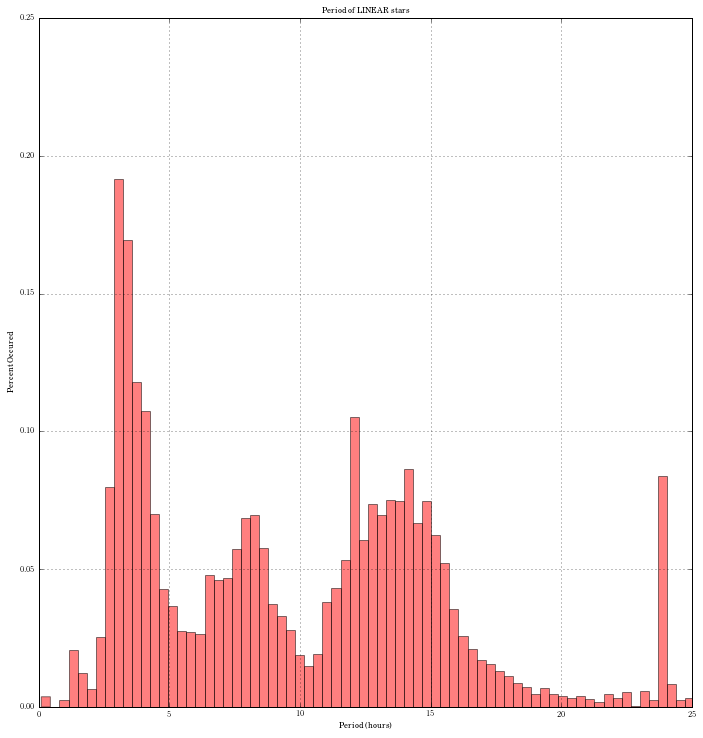

In [13]:
# Plot the histogram of all 7010 star periods

fig = plt.figure(figsize=(11, 11))
fig.subplots_adjust(bottom=0.08, top=0.95, right=0.95, hspace=0.1)

ax = fig.add_subplot(111)
plt.hist(Period_lot, 1000, normed=1, facecolor='red', alpha=0.5)
ax.set_xlim(0,25)
ax.set_ylim(0.,0.25)
ax.set_xlabel('Period (hours)')
ax.set_ylabel('Percent Occured')
ax.set_title('Period of LINEAR stars')
plt.grid(True)
plt.show()